In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import pickle
%matplotlib inline

In [3]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


In [4]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [5]:
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/Arxiv Topic Classification/first 1 million/"

In [6]:
train_data = pd.read_csv(FILE_PATH + "train_data.csv")
test_data = pd.read_csv(FILE_PATH + "test_data.csv")

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949875 entries, 0 to 949874
Columns: 157 entries, text to stat.TH
dtypes: int64(156), object(1)
memory usage: 1.1+ GB


In [8]:
train_data.head()

,text,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,cond-mat.dis-nn,cond-mat.mes-hall,...,q-fin.RM,q-fin.ST,q-fin.TR,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH
0,calcul prompt diphoton product cross section t...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sparsitycertifi graph decomposit describ new a...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,evolut earthmoon system base dark matter field...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,determin stirl cycl number count unlabel acycl...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,dyadic lambdaalpha lambdaalpha paper show comp...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# remove the "text" from the label_name
label_name = list(train_data.columns)
label_name.pop(0)
print(label_name)

['astro-ph', 'astro-ph.CO', 'astro-ph.EP', 'astro-ph.GA', 'astro-ph.HE', 'astro-ph.IM', 'astro-ph.SR', 'cond-mat.dis-nn', 'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.str-el', 'cond-mat.supr-con', 'cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR', 'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS', 'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR', 'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA', 'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO', 'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY', 'econ.EM', 'econ.GN', 'econ.TH', 'eess.AS', 'eess.IV', 'eess.SP', 'eess.SY', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'math.AC', 'math.AG', 'math.AP', 'math.AT', 'math.CA', 'math.CO', 'math.CT', 'math.CV', 'math.DG', 'math.DS', 'math.FA', 'math.GM', 'math.GN', 'math.GR', 'math.GT', 'math.HO', 'math.IT', 'math.KT', 'math.LO', 'math.MG',

In [36]:
len(label_name)

156

In [37]:
with open(FILE_PATH + 'label_name.pkl', 'wb') as handle:
  pickle.dump(label_name, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
X_train, y_train = train_data["text"], train_data[label_name]

In [11]:
X_test, y_test = test_data["text"], test_data[label_name]

## Tokenization

In [12]:
UNIQUE_WORD_COUNT = 25_000
MAX_PAD_LENGTH = 210

In [13]:
tokenizer = Tokenizer(num_words = UNIQUE_WORD_COUNT)
# tokenizer.fit_on_texts(X_train)

In [14]:
# saving the tokenizer
# with open(FILE_PATH + 'tokenizer.pkl', 'wb') as handle:
#   pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
with open(FILE_PATH + 'tokenizer.pkl', 'rb') as handle:
  tokenizer = pickle.load(handle)

In [16]:
%%time
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences)
train_padded = pad_sequences(train_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(train_padded[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[  103  2535  4041   167   327   529  2609   757    20   726   338   103
   289    23  4456    22   167   438   260   246   729  1061  8047    30
   289   306 12130 23857  8842   127    63 22577  3422  1188   502   604
 16157  1187   554   140    48    28  1590   103  1066   531   587   147
    17  3664  2609   123   748   394   189  3272    17   123   223    41
  4041   246   324    20    51   729  1061   757    41  4041   246   227
   542   464   707   324   705    60   757     6   399   457   258    53
  6902   317   373     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [17]:
%%time
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = MAX_PAD_LENGTH, padding = "post", truncating = "post")
print(test_padded[0])

[577, 4225, 384, 59, 882, 384, 295, 124, 577, 4225, 384, 59, 7345, 544, 110, 384, 324, 563, 582, 882, 72, 18, 7345, 384, 499, 1266, 1447, 187, 230, 3347, 495, 1107, 1238, 271, 1246, 156, 413, 908, 980, 329, 10, 124, 110, 7345, 18, 19882, 964, 2670, 497, 597, 374, 18, 21315, 238, 168, 2334, 822, 125, 1266, 1447, 454, 8, 62, 92, 318, 1131, 1070, 181, 18, 250, 124, 110, 534, 11697, 1101, 49, 21315, 238, 455, 1980, 182, 168, 881, 271, 1246, 555, 7685, 7345, 617, 166, 19244, 7345]
[  577  4225   384    59   882   384   295   124   577  4225   384    59
  7345   544   110   384   324   563   582   882    72    18  7345   384
   499  1266  1447   187   230  3347   495  1107  1238   271  1246   156
   413   908   980   329    10   124   110  7345    18 19882   964  2670
   497   597   374    18 21315   238   168  2334   822   125  1266  1447
   454     8    62    92   318  1131  1070   181    18   250   124   110
   534 11697  1101    49 21315   238   455  1980   182   168   881   271
  1246  

## Model Development

In [18]:
y_train.head()

,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,cond-mat.dis-nn,cond-mat.mes-hall,cond-mat.mtrl-sci,...,q-fin.RM,q-fin.ST,q-fin.TR,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
N_CLASSES = 156

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [22]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [23]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
OUTPUT_DIM = N_CLASSES

## Mode Development
inputs = layers.Input(shape=(MAX_PAD_LENGTH,))
embedding_layer = TokenAndPositionEmbedding(MAX_PAD_LENGTH, UNIQUE_WORD_COUNT, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(OUTPUT_DIM, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 23.7 MB/s eta 0:00:00


In [25]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = [tf.keras.metrics.BinaryAccuracy(),
           tfa.metrics.HammingLoss(mode='multilabel'),
           ]
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=metrics)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 210)]             0         
                                                                 
 token_and_position_embeddin  (None, 210, 32)          806720    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 210, 32)          10656     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 32)                0     

In [28]:
history = model.fit(train_padded, y_train, batch_size=512, epochs = 5, validation_data=(test_padded, y_test))

Epoch 1/5
1856/1856 [==============================] - 195s 97ms/step - loss: 0.0392 - binary_accuracy: 0.9896 - hamming_loss: 0.0115 - val_loss: 0.0221 - val_binary_accuracy: 0.9927 - val_hamming_loss: 0.0078
Epoch 2/5
1856/1856 [==============================] - 104s 56ms/step - loss: 0.0218 - binary_accuracy: 0.9927 - hamming_loss: 0.0077 - val_loss: 0.0201 - val_binary_accuracy: 0.9932 - val_hamming_loss: 0.0074
Epoch 3/5
1856/1856 [==============================] - 99s 53ms/step - loss: 0.0202 - binary_accuracy: 0.9931 - hamming_loss: 0.0073 - val_loss: 0.0194 - val_binary_accuracy: 0.9933 - val_hamming_loss: 0.0072
Epoch 4/5
1856/1856 [==============================] - 97s 52ms/step - loss: 0.0195 - binary_accuracy: 0.9933 - hamming_loss: 0.0072 - val_loss: 0.0191 - val_binary_accuracy: 0.9934 - val_hamming_loss: 0.0071
Epoch 5/5
1856/1856 [==============================] - 100s 54ms/step - loss: 0.0190 - binary_accuracy: 0.9934 - hamming_loss: 0.0070 - val_loss: 0.0187 - val_bin

In [29]:
model_path = FILE_PATH + "model2.h5"
model.save(model_path)

In [30]:
history_path = FILE_PATH + "history2.history"
with open(history_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

## Model Evaluation

In [32]:
history_path = FILE_PATH + "history2.history"
with open(history_path, "rb") as file_pi:
    history = pickle.load(file_pi)

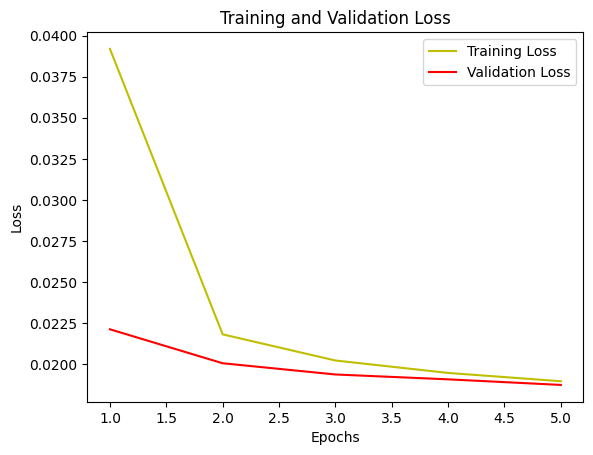

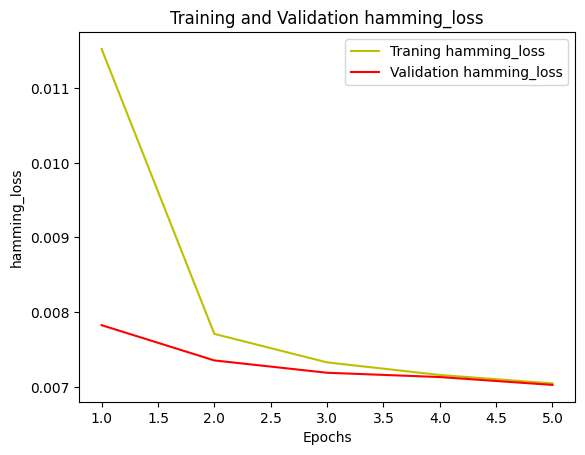

In [34]:
def historyVisualization(history):
  #plot the training and validation accuracy and losss at each epoch
  loss = history['loss']
  val_loss = history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label="Training Loss")
  plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
  plt.title('Training and Validation Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  print()

  acc = history['hamming_loss']
  val_acc = history['val_hamming_loss']
  plt.plot(epochs, acc, 'y', label = "Traning hamming_loss")
  plt.plot(epochs, val_acc, 'r', label = "Validation hamming_loss")
  plt.title("Training and Validation hamming_loss")
  plt.xlabel("Epochs")
  plt.ylabel("hamming_loss")
  plt.legend()
  plt.show()

  print()

historyVisualization(history)